<h1 style="color:Red;"> Importing the libaries </h1>

In [1]:
import pandas as pd
import numpy as np

<h1 style="color:Green;"> Sanitisation </h1>

In [2]:
FullSetClean = pd.read_csv("data_edited3.csv")

#####
"""
Put Further Sanitation Code here.
OR any sanitation code
"""
FullSetClean = FullSetClean.drop(columns = "currency")

stateBin = []
for row in FullSetClean["state"]:
    if row == "successful":
        stateBin.append(1)
    else:
        stateBin.append(0)

FullSetClean["StateBin"] = stateBin
FullSetClean = FullSetClean.drop(columns = "state")
FullSetClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45585 entries, 0 to 45584
Data columns (total 9 columns):
name                45585 non-null object
category            45585 non-null object
deadline            45585 non-null object
launched            45585 non-null object
backers             45585 non-null int64
country             45585 non-null object
usd_pledged_real    45585 non-null float64
usd_goal_real       45585 non-null float64
StateBin            45585 non-null int64
dtypes: float64(2), int64(2), object(5)
memory usage: 3.1+ MB


<h1 style="color:Fuchsia;"> The functions related to the words </h1>

<h1 style="color:Teal;"> Letter Related Functions </h1>

In [3]:

def StartingChar(string : str): # discontinued as does not output a numerical number that could be used later.
    return string[0]

def Length(string : str):
    return len(string)

def NumberOfWords(string :  str):
    output = 0
    string = string.split()
    for word in string:
         if any(c.isalpha() for c in word): ##sees if there is a letter in the collection of chars
                output += 1
    return output

def Capitilisation(string : str):
    plus = 0
    minus = 0
    for char in string:
        if char.islower():
            plus +=1
        elif char.isupper():
            minus += 1
    return (plus/(plus + minus))

def Punctuation(string : str):
    plus = 0
    minus = 0
    for char in string:
        if char in ". , / ? ; : ‘ () !”":
            plus +=1
        else:
            minus += 1
    return (plus/(plus + minus))

def nonPunctuation(string:str):
    plus = 0
    minus = 0
    for char in string:
        if char in "\|£$%^&*-_+={}[]@~#<>¬":
            plus +=1
        else:
            minus += 1
    return (plus/(plus + minus))

def Vowels(string : str):
    plus = 0
    minus = 0
    string = string.lower()
    for char in string:
        if char in "aeiou":
            plus += 1
        elif char.isalpha():
            minus += 1
    return (plus/(plus + minus))

def Plositives(string : str):
    plus = 0
    minus = 0
    string = string.lower()
    for char in string:
        if char in "ptkbdg":
            plus += 1
        elif char.isalpha():
            minus += 1
    return (plus/(plus + minus))

def frictives(string : str):
    plus = 0
    minus = 0
    string  = string.lower()
    for char in string:
        if char in "fsvz":
            plus += 1
        elif char.isalpha():
            minus += 1
    return (plus/(plus + minus))

def alliteration(string : str):
    output = 0
    string = string.lower()
    string = string.split()
    previousLetter = ""
    output = 0
    for word in string:
        if word[0] == previousLetter:
                output += 1
        else:
            previousLetter = word[0]
        
    return output

functionList = [
                [Length , "Word Length"],
                [NumberOfWords , "Number Of Words"],
                [Capitilisation , "Capitilisation"],
                [Punctuation , "Punctuation"],
                [nonPunctuation , "nonPunctuation"],
                [Vowels , "Vowels"],
                [Plositives, "Plositives"],
                [frictives,"frictives"],
                [alliteration,"alliteration"]
               ]
    
print(NumberOfWords("Test Test test a!")) 
print (frictives("test test test"))
print (Capitilisation("TEst Test Test"))
print (alliteration("Fest Test test"))

4
0.25
0.6666666666666666
1


In [4]:
# At some point this will be changed to a genralised function.
#base plan:
#all the analytics function will take a string return a number (float or int 64 )

#there will be an itterator high order function that takes the analytic function. 
#and the applies it to all of the titles and returns a list


###The itterator high order

def itterator(function,ColName,dataSet):
    output = list()
    for n , string in enumerate(dataSet["name"]):
        output.append(function(string))
    dataSet[ColName] = output
    


In [5]:

for point in functionList:
    itterator(point[0],point[1],FullSetClean)
    print(point[0])

print ("done functions")

<function Length at 0x7f2acaf3e950>
<function NumberOfWords at 0x7f2acaf3ec80>
<function Capitilisation at 0x7f2acaf3ed08>
<function Punctuation at 0x7f2acaf3ed90>
<function nonPunctuation at 0x7f2acaf3ee18>
<function Vowels at 0x7f2acaf3eea0>
<function Plositives at 0x7f2acaf3ef28>
<function frictives at 0x7f2acc189048>
<function alliteration at 0x7f2acc1890d0>
done functions


<h1 style="color:Orange;"> Time Related Functions </h1>

In [6]:
import datetime
def dateTimeitterator(dataSet):
    Launchweekdays = []
    Launchhours = []
    elapsedDays= []
    deadlineweekdays = []
    draw = []
    sraw = []
    
    for n , string in enumerate(dataSet["launched"]):
        date , time = string.split(" ")
        day , month ,year = date.split("/")
        hour, mineut = time.split(":")
        raw = datetime.date(int(year), int(month), int(day))

        
        Launchweekdays.append(int(raw.weekday()))
        Launchhours.append(int(hour))
        sraw.append(raw)
        
    for n , string in enumerate(dataSet["deadline"]):
        
        day , month ,year = string.split("/")
        hour, mineut = time.split(":")
        raw = datetime.date(int(year), int(month), int(day))
        deadlineweekdays.append(raw.weekday())
        draw.append(raw)
        

    elapsedDays = [(a - b).days for a, b in zip(sraw, draw)]
    dataSet["LaunchWeekday"] = Launchweekdays
    dataSet["LaunchHour"] =  Launchhours
    dataSet["elapsedDay"] = elapsedDays
    dataSet["deadlineWeekday"] = deadlineweekdays
    
 

In [7]:

dateTimeitterator(FullSetClean)
print ("done Timeritterato")

done Timeritterato


<h1 style="color:salmon;"> Data Base Splitting (to be added data base correction) + Dataset Balancing </h1>

In [8]:
# Data base splitting done bellow 

from sklearn.model_selection import train_test_split

train,other = train_test_split(FullSetClean, test_size=0.2,random_state=0);

validation , test = train_test_split(other, test_size=0.5,random_state=0);

train.head()

# FullSetClean.head()
# FullSetClean.info(verbose = True)

# BALANCES THE TRAINING DATASET:

total = len(train)
nb_pos = train['StateBin'].sum()
nb_neg = total - nb_pos

success_pos = train.loc[train['StateBin'] == 1]
success_neg = train.loc[train['StateBin'] == 0].sample(nb_pos)





resampled_train = train
#resampled_train = pd.concat((success_pos, success_neg))

# CHECKS THAT RESAMPLING HAS BEEN SUCCESSFUL:

# total = len(resampled_train)
# nb_pos = resampled_train['StateBin'].sum()
# nb_neg = total - nb_pos

# print('Successful: {}' .format(nb_pos))
# print('Failed: {}' .format(nb_neg))

# BALANCES THE VALIDATION DATASET:

total = len(validation)
nb_pos = validation['StateBin'].sum()
nb_neg = total - nb_pos

success_pos = validation.loc[validation['StateBin'] == 1]
success_neg = validation.loc[validation['StateBin'] == 0].sample(nb_pos)




resampled_validation = validation

#resampled_validation = pd.concat((success_pos, success_neg))

# CHECKS THAT RESAMPLING HAS BEEN SUCCESSFUL:

# total = len(resampled_validation)
# nb_pos = resampled_validation['StateBin'].sum()
# nb_neg = total - nb_pos

# print('Successful: {}' .format(nb_pos))
# print('Failed: {}' .format(nb_neg))

<h1 style="color:Purple;"><i> Now for the word proccessing </i></h1>

In [9]:
import re

def sanitiser(title : str) -> list: #takes a string splits into words , makes lower case and removes punctuation
    words = title.split()
    output = []
    for word in words:
       output.append(re.sub(r'\W+', '', word).lower())
    return output

def WordFinder(dataSet,cutoff : int) -> dict and list: #so takes in the data set , a cut off an renturns a list of all words above the cutoff and their percentage chance of succsess
    LargeWordDictionary = {} #The dict for all of the words 
    
    for n , title in enumerate(dataSet["name"]): #goes through the big old list
        temp = sanitiser(title) #sanitises the function
        for word in temp: #basically sees if the word is already in the large list of words if it is then it adds its location in the data base to the end of the dict entry
            try:
                LargeWordDictionary[word].append(n)
            except KeyError:
                LargeWordDictionary[word] = [n]
                
    SmallWordDictionary = {} #small output dictionary
    StateBin = dataSet["StateBin"].tolist() #transfers database to list due to pandas related issues
    for word in LargeWordDictionary: # goes through large dictionary , counts number of instances of each word appearing , and then uses the pointers to find if they were success 
        Suc = 0
        for pointer in LargeWordDictionary[word]:
            Suc += StateBin[int(pointer)]
        length = len(LargeWordDictionary[word])
        if length >= cutoff:
            SmallWordDictionary[word] = [length , Suc/length]
    print(len(SmallWordDictionary))
    
    return SmallWordDictionary
    #return LargeWordDictionary


def WordScore(title : str,AssementDictionary : dict ,split : int) ->list:
    title = sanitiser(title)
    output = [0 for i in range(split)]
    unique = 0
    for word in title:
        try:
            temp = AssementDictionary[word][1]
            for i in range(split):
                if temp > 1 *((i+1)/split):
                    pass
                else:
                    output[i] += 1
                    break
        except KeyError:
            unique += 1
    return output , unique


def wordItterator(dataset , split): #### UNUSED FUNCTION AT THE MOMENT
    output = []
    for n , title in enumerate(dataSet["name"]):
        output.append(WordScore(title,dataset,assmentDict,split))
    output = np.transpose(output)
    for n , row in enumerate(output):
        dataset[str(n)] = row
        
        
    
def wordWorst(title : str , AssementDict : dict):
    title = sanitiser(title)
    unique = 0
    for word in title:
        try:
            temp = AssementDict[word][1]
            if temp > maximum:
                maximum = temp
            elif temp < minimum:
                minimum = temp
        except KeyError:
            unique += 1
        except NameError:
            maximum , minimum = temp , temp
    
    try:
        return maximum , minimum , unique
    except NameError:
        return 0.5 , 0.5 , unique #There may be a better way of dealig with this but this just an easy way to deal with it.
    
    
def wordWorstItterator(dataSet,AssmentDict):
    maximum = []
    minimum = []
    unique = []
    TotalFailures = 0
    for n , title in enumerate(dataSet["name"]):
        temp = wordWorst(title ,AssmentDict )
        maximum.append(temp[0])
        minimum.append(temp[1])
        unique.append(temp[2])
        if temp[0] > 0.7 and temp[1] < 0.3:
            TotalFailures += 1
    dataSet["maximum"] = maximum
    dataSet["minimum"] = minimum
    dataSet["unique"] = unique
    print(TotalFailures)
    
sanitiser("ghgh ghgh!!!!  FDKFKF  g")

#728 2633 56

['ghgh', 'ghgh', 'fdkfkf', 'g']

In [10]:
TrainAll = WordFinder(resampled_train,20)

wordWorstItterator(resampled_train,TrainAll)
wordWorstItterator(resampled_validation,TrainAll)
wordWorstItterator(test,TrainAll)

#print(TrainClasses)

print (WordScore("miniatures blank food",TrainAll,10))



1386


/home/bartypitt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/bartypitt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/bartypitt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas

368
53
74
([0, 0, 1, 0, 0, 0, 0, 0, 1, 0], 1)


<h1 style="color:DodgerBlue;"> Now For the Graphs </h1>

In [11]:
def percentageAtIntervalFloat(dataSet ,varible : str,splits : int) -> list :
    #create the search thing
    minimum = dataSet[varible].min()
    maximum = dataSet[varible].max()
    print(minimum , maximum)
    difference = maximum - minimum
    space = difference / splits
    output = [[a,[0,0]] for a in np.arange(minimum,maximum,space)]
    testLevels = [a for a in np.arange(minimum,maximum,space)]
    Values = dataSet[varible].tolist()
    successes = dataSet["StateBin"].tolist()
    
    for Value , success in zip(Values,successes):
        for n , level in enumerate(testLevels):
            if Value <= level:
                if  success == 1:
                    output[n][1][1] += 1
                else:
                    output[n][1][0] += 1
                break
    
    percentOutput = []
    for level in output:
        if level[1][1] == 0:
            percentOutput.append(0)
        else:
            percentOutput.append(level[1][1]/(level[1][1]+level[1][0]))
    return percentOutput

def percentageAtIntervalInt(dataSet ,varible : str) -> list : ###Recode so that it works with intergers
    #create the search thing
    minimum = dataSet[varible].min()
    maximum = dataSet[varible].max()
    difference = maximum - minimum
    output = [[a,[0,0]] for a in np.arange(minimum,maximum)]
    testLevels = [a for a in np.arange(minimum,maximum)]
    Values = dataSet[varible].tolist()
    successes = dataSet["StateBin"].tolist()
    
    for Value , success in zip(Values,successes):
        for n , level in enumerate(testLevels):
            if Value <= level:
                if  success == 1:
                    output[n][1][1] += 1
                else:
                    output[n][1][0] += 1
                break
    
    percentOutput = []
    for level in output:
        if level[1][1] == 0:
            percentOutput.append(0)
        else:
            percentOutput.append(level[1][1]/(level[1][1]+level[1][0]))
    return percentOutput
    

In [12]:
import matplotlib.pyplot as plt

"""
test["Vowels"].max()
for n , Fun in enumerate(functionList):

    print(Fun[1])
    LookList = percentageAtIntervalFloat(FullSetClean , Fun[1],20)
    plt.subplot(3,3,n + 1)
    plt.pl1781 ot(LookList)
"""

'\ntest["Vowels"].max()\nfor n , Fun in enumerate(functionList):\n\n    print(Fun[1])\n    LookList = percentageAtIntervalFloat(FullSetClean , Fun[1],20)\n    plt.subplot(3,3,n + 1)\n    plt.pl1781 ot(LookList)\n'

<h1 style="color:Navy;"> Machine Learning Code Taken From Tutorial </h1>

In [14]:
###The bit of the code when we standardise the data

resampled_train.drop(columns=["name","usd_pledged_real","launched","backers","deadline"],inplace=True)
resampled_validation.drop(columns=["name","usd_pledged_real","launched","backers","deadline"],inplace=True)
test.drop(columns=["name","usd_pledged_real","launched","backers","deadline"],inplace=True)


X_test = test.drop(columns = "StateBin")
Y_test = test["StateBin"]


X_train = resampled_train.drop(columns = "StateBin")
Y_train = resampled_train["StateBin"]

X_validation = resampled_validation.drop(columns="StateBin")
Y_validation = resampled_validation["StateBin"]



/home/bartypitt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [15]:
print(X_train.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36468 entries, 27337 to 2732
Data columns (total 19 columns):
category           36468 non-null object
country            36468 non-null object
usd_goal_real      36468 non-null float64
Word Length        36468 non-null int64
Number Of Words    36468 non-null int64
Capitilisation     36468 non-null float64
Punctuation        36468 non-null float64
nonPunctuation     36468 non-null float64
Vowels             36468 non-null float64
Plositives         36468 non-null float64
frictives          36468 non-null float64
alliteration       36468 non-null int64
LaunchWeekday      36468 non-null int64
LaunchHour         36468 non-null int64
elapsedDay         36468 non-null int64
deadlineWeekday    36468 non-null int64
maximum            36468 non-null float64
minimum            36468 non-null float64
unique             36468 non-null int64
dtypes: float64(9), int64(8), object(2)
memory usage: 5.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int

In [16]:
from sklearn import preprocessing


for col in X_train.columns:
    if X_train[col].dtype == "int64" or X_train[col].dtype == "float64":
        X_means = X_train[col].mean(axis=0)
        X_stds = X_train[col].std(axis=0)

        # Standardise the splits.
        X_train[col] = (X_train[col] - X_means) / X_stds
        X_validation[col] = (X_validation[col] - X_means) / X_stds
        X_test[col] = (X_test[col] - X_means) / X_stds
        
    else:
        le = preprocessing.LabelEncoder()
        le.fit(list(X_train[col].unique()))
        X_train[col] = le.transform(X_train[col]) 
        X_validation[col] = le.transform(X_validation[col])
        X_test[col] = le.transform(X_test[col])
        #X_validation.drop(columns=str(col),inplace=True)


X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36468 entries, 27337 to 2732
Data columns (total 19 columns):
category           36468 non-null int64
country            36468 non-null int64
usd_goal_real      36468 non-null float64
Word Length        36468 non-null float64
Number Of Words    36468 non-null float64
Capitilisation     36468 non-null float64
Punctuation        36468 non-null float64
nonPunctuation     36468 non-null float64
Vowels             36468 non-null float64
Plositives         36468 non-null float64
frictives          36468 non-null float64
alliteration       36468 non-null float64
LaunchWeekday      36468 non-null float64
LaunchHour         36468 non-null float64
elapsedDay         36468 non-null float64
deadlineWeekday    36468 non-null float64
maximum            36468 non-null float64
minimum            36468 non-null float64
unique             36468 non-null float64
dtypes: float64(17), int64(2)
memory usage: 5.6 MB


In [17]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

def select_column_to_add(X_train, y_train, X_val, y_val, columns_in_model, columns_to_test):
    
    column_best = None
    columns_in_model = list(columns_in_model)
    
    if len(columns_in_model) == 0:
        acc_best = 0
    elif len(columns_in_model) == 1:
        mod = LogisticRegression(C=1e9).fit(X_train[columns_in_model].values.reshape(-1, 1), y_train)
        acc_best = accuracy_score(y_val, mod.predict(X_val[columns_in_model].values.reshape(-1, 1)))
    else:
        mod = LogisticRegression(C=1e9).fit(X_train[columns_in_model], y_train)
        acc_best = accuracy_score(y_val, mod.predict(X_val[columns_in_model]))

    
    for column in columns_to_test:
        mod = LogisticRegression(C=1e9).fit(X_train[columns_in_model+[column]], y_train)
        y_pred = mod.predict(X_val[columns_in_model+[column]])
        acc = accuracy_score(y_val, y_pred)
        
        if acc - acc_best >= 0.001:  # one of our stopping criteria
            acc_best = acc
            column_best = column
        
    if column_best is not None:  # the other stopping criteria
        print('Adding {} to the model'.format(column_best))
        print('The new best validation accuracy is {}'.format(acc_best))
        columns_in_model_updated = columns_in_model + [column_best]
    else:
        print('Did not add anything to the model')
        columns_in_model_updated = columns_in_model
    
    return columns_in_model_updated, acc_best , mod

In [18]:
columns_to_test = set(X_train)
full_list = set(X_train)

columns_in_model = list();

for i in range(10):
    columns_in_model , acc , LogicalRegression = select_column_to_add(X_train,Y_train,X_validation,Y_validation,columns_in_model,columns_to_test)    
    columns_to_test = full_list.difference(columns_in_model)
    


Adding maximum to the model
The new best validation accuracy is 0.6276875822729268
Adding minimum to the model
The new best validation accuracy is 0.6358051777095217
Adding LaunchWeekday to the model
The new best validation accuracy is 0.6384379113646336
Adding Number Of Words to the model
The new best validation accuracy is 0.6410706450197455
Adding usd_goal_real to the model
The new best validation accuracy is 0.6500658183413778
Adding frictives to the model
The new best validation accuracy is 0.6518209741114523
Adding LaunchHour to the model
The new best validation accuracy is 0.6533567354102676
Did not add anything to the model
Did not add anything to the model
Did not add anything to the model


<h1> Tree Code </h1>

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

%matplotlib qt 

best_model = None
max_validation_accuracy = 0

AccuracyTraining = []
AccuracyValidation = []
ka = []


master = []
for depth in range(25):
    row = []
    for MID in range(10):
        model = RandomForestClassifier(random_state=2, n_estimators=5, max_depth=depth+1,min_impurity_decrease = MID*0.0001)

        model.fit(X_train, Y_train)

        y_pred = model.predict(X_train)
        accuracy = accuracy_score(Y_train, y_pred)
        AccuracyTraining.append(accuracy)

        y_pred = model.predict(X_validation)
        accuracy = accuracy_score(Y_validation, y_pred)
        AccuracyValidation.append(accuracy)
        row.append(accuracy)
    master.append(row)
        


master = np.transpose(master)
        
plt.plot(master)
plt.legend([i for i in range(25)])

print(master)
#plt.plot(ka,AccuracyValidation)

"""
Forrest = best_model

#Confusion Matrix
#y_pred = Forrest.predict(X_validation)
#accuracy = accuracy_score(Y_validation, y_pred)
#confusion_matrix(Y_validation, y_pred)
"""

[[0.57086441 0.64348398 0.63997367 0.63646336 0.64853006 0.65204037
  0.65204037 0.65445371 0.65928039 0.65533129 0.66081615 0.65379552
  0.65269855 0.64962703 0.65730584 0.6430452  0.64611672 0.64370338
  0.64172883 0.63909609 0.6428258  0.63536639 0.63229487 0.63207547
  0.63668276]
 [0.57086441 0.64348398 0.63997367 0.63646336 0.64392277 0.65182097
  0.65204037 0.65752523 0.66235191 0.66213251 0.67112769 0.66608161
  0.65949978 0.66388767 0.65840281 0.65796402 0.65533129 0.66717859
  0.65752523 0.66695919 0.65664765 0.65642826 0.66059675 0.65401492
  0.6546731 ]
 [0.57086441 0.64348398 0.63997367 0.64129004 0.6430452  0.65204037
  0.6509434  0.65818341 0.65445371 0.6588416  0.65533129 0.6627907
  0.65818341 0.6627907  0.66059675 0.66235191 0.66235191 0.66235191
  0.66235191 0.66235191 0.66235191 0.66235191 0.66235191 0.66235191
  0.66235191]
 [0.57086441 0.64348398 0.63997367 0.64129004 0.64765248 0.65708644
  0.65598947 0.65247916 0.65840281 0.65752523 0.65818341 0.65555068
  0.657

'\nForrest = best_model\n\n#Confusion Matrix\n#y_pred = Forrest.predict(X_validation)\n#accuracy = accuracy_score(Y_validation, y_pred)\n#confusion_matrix(Y_validation, y_pred)\n'

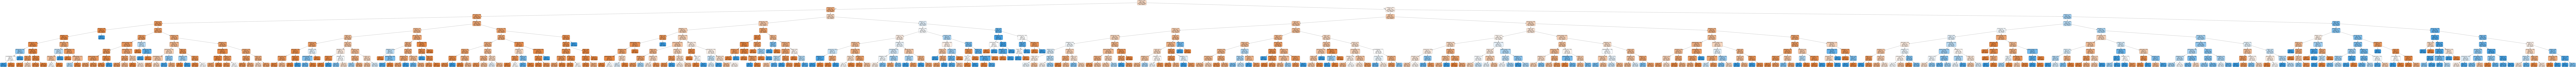

In [20]:
estimator = best_model.estimators_[10]

from sklearn.tree import export_graphviz
# Export as dot file
predictors = X_train.columns

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = predictors,
                class_names = ('Negative', 'Positive'),
                rounded = True, proportion = False, 
                precision = 2, filled = True)


# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'nope.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'nope.png')





In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

AccuracyTraining = []
AccuracyValidation = []
Depth = []

# your code here
for i in range(1):
    Depth.append(i + 1)
    model2 = DecisionTreeClassifier(random_state = 1 ,max_depth = 9) # Our classification tree
    model2 = model2.fit(X_train, Y_train)
    
    y_pred = model2.predict(X_train)
    accuracy = accuracy_score(Y_train, y_pred)
    AccuracyTraining.append(accuracy)
    
    y_pred = model2.predict(X_validation)
    accuracy = accuracy_score(Y_validation, y_pred)
    AccuracyValidation.append(accuracy)
    print(accuracy)
    
plt.plot(Depth,AccuracyTraining)
plt.plot(Depth,AccuracyValidation)


tree2 = model2

#Confusion Matrix
y_pred = model2.predict(X_validation)
accuracy = accuracy_score(Y_validation, y_pred)
AccuracyValidation.append(accuracy)
print(accuracy)
    

0.6467749012724879
0.6467749012724879


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
# your code here
Y_validation
print('\nFor the validation set:')
print('Accuracy: \t{}'.format(accuracy_score(Y_validation, model2.predict(X_validation))))
print('Precision: \t{}'.format(precision_score(Y_validation, model2.predict(X_validation))))
print('Recall: \t{}'.format(recall_score(Y_validation, model2.predict(X_validation))))



For the validation set:
Accuracy: 	0.6467749012724879
Precision: 	0.6052311435523114
Recall: 	0.5086912065439673


In [23]:
import sklearn.tree as tree
import graphviz
dot_data = tree.export_graphviz(model2, out_file=None) 
graph = graphviz.Source(dot_data) 

predictors = X_train.columns
export_graphviz (model2, out_file='tree.dot', 
                feature_names = predictors,
                class_names = ('Negative', 'Positive'),
                rounded = True, proportion = False, 
                precision = 2, filled = True)


# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

y_pred = model2.predict(X_validation)
accuracy = accuracy_score(Y_validation, y_pred)

print(accuracy) 

0.6467749012724879


Vector Test

In [24]:
from sklearn.svm import SVC

clf = SVC(gamma='auto' ,C = 0.8)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_validation)
accuracy = accuracy_score(Y_validation, y_pred)
print(accuracy)
    

0.6643264589732338


In [25]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4559 entries, 28 to 33134
Data columns (total 19 columns):
category           4559 non-null int64
country            4559 non-null int64
usd_goal_real      4559 non-null float64
Word Length        4559 non-null float64
Number Of Words    4559 non-null float64
Capitilisation     4559 non-null float64
Punctuation        4559 non-null float64
nonPunctuation     4559 non-null float64
Vowels             4559 non-null float64
Plositives         4559 non-null float64
frictives          4559 non-null float64
alliteration       4559 non-null float64
LaunchWeekday      4559 non-null float64
LaunchHour         4559 non-null float64
elapsedDay         4559 non-null float64
deadlineWeekday    4559 non-null float64
maximum            4559 non-null float64
minimum            4559 non-null float64
unique             4559 non-null float64
dtypes: float64(17), int64(2)
memory usage: 712.3 KB


<h1>Doing it with the test data </h1> 

In [26]:
#test.drop(columns=["name","usd_pledged_real","launched","backers","deadline"],inplace=True)


modelList = [clf,tree2,Forrest]

for model in modelList:
    print(model)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    print(accuracy)
    k = confusion_matrix(Y_test, y_pred)
    print(k)
    

SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.6823864882649704
[[2171  473]
 [ 975  940]]
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')
0.6727352489581049
[[2036  608]
 [ 884 1031]]
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=14, n_jobs=None,
       